<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:  This represents the data on which the neural network is applied.  It is the initial data that is brought into the neural network for further processing by subsequent layers of artificial neurons. The input layer is at the very beginning of the workflow for the artificial neural network.  It is sometimes said to consist of “passive” neurons that do not take in information from previous layers because they are the very first layer of the network.  There is only one input layer in a neural network.

### Hidden Layer:  This is a layer in between the input layers and output layers, where artificial neurons take in a set of weighted inputs and produce an output through an activation function. It is a typical part of nearly any neural network. This intermediate layer is the place where all of the computation is done.  There can be multiple hidden layers in a neural network.

### Output Layer:  This is the last layer of neurons that produce the results of applying the neural network. Though they are made much like other artificial neurons in the neural network, output layer neurons may be built or observed in a different way, given that they are the last “actor” nodes on the network.  There is only one output layer in a neural network.

### Neuron:  A traditional artificial neuron is composed of some weighted inputs, a transformation function and activation function corresponding to the biological neuron’s axon. (However, output layer neurons may be designed differently in order to streamline and improve the end results of the iterative process.)  The neuron works to adjust the weights based on lots of examples of inputs and outputs.  A neuron adjusts the weights based on the inputs and the desired outputs.  In general, a neuron:
    1) Takes the inputs and multiplies them by their weights,
    2) Sums up the result of the above defined multiplication,
    3) Applies the activation function to the sum.


### Weight:  Weights capture how important is each features in making a final decision and if each feature is increasing or decreasing the probability of the thesis.  The weights that contribute more to the overall “error” will have larger derivation values, which means that they will change more (when computing Gradient descent).

### Activation Function:  The activation function defines if given node should be “activated” or how “active” a given node will be based on the weighted sum mentioned in item (2) under neuron.  

### Node Map:  A node map functions similar to a program's code.  It provides a rerpresentation of the flow of information through a neural network.  Perceptrons can be viewed as building blocks in a single layer in a neural network containing all three of the functions indicated in the defnition of neuron above.  


### Perceptron:  A perceptron is the smallest fully functional unit of a neural network.  The goal of a perceptron is to determine from the input whether the feature it is recognizing is true, in other words whether the output is going to be a 0 or 1.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here   Information generally flows only from the input to the output layers but in some types of neural networks there are more intricate connections, such as feedback paths.  The nodes of the input layer are passive, because they do not modify the data. They receive a single value on their input, and duplicate the value to their multiple outputs.  Each value from the input layer is duplicated and sent to all of the hidden nodes. This is called a fully interconnected structure.   The values entering a hidden node are multiplied by weights, a set of predetermined numbers stored in the program. The weighted inputs are then added to produce a single number.   Before leaving the node, this number is passed through a nonlinear mathematical function called a sigmoid. This is an "s" shaped curve that limits the node's output. That is, the input to the sigmoid is a value between -∞ and +∞, while its output can only be between 0 and 1.  The active nodes of the output layer combine and modify the data to produce the two output values of the neural network.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [71]:
import pandas as pd
# x0 is added a dummy variable for the bias term
data = { 'x0': [1,1,1,1],
         'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df_x = df.drop(['y'], axis=1)
print(df_x.head(), '\n')
df_y = df.drop(['x0', 'x1', 'x2'], axis=1)
print(df_y.head())


   x0  x1  x2
0   1   0   0
1   1   1   0
2   1   0   1
3   1   1   1 

   y
0  1
1  1
2  1
3  0


In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Training the Perceptron
#
# x:   feature data
# y:   outputs
# z:   threshold
# eta: learning rate
# t:   number of iterations

def perceptron_train(x, y, z, eta, t):

    # Initializing parameters for the Perceptron
    w = np.zeros(len(x.iloc[0]))        # initial weights
    n = 0                          

    # Initializing additional parameters to compute sum-of-squared errors
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
 
    while n < t:                                  
        for i in range(0, len(x)):                 

            # summation step
            f = np.dot(x.iloc[i], w)                      

            # activation function
            if f > z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0.
            yhat_vec[i] = yhat                              

            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(y.iloc[i]-yhat)*x.iloc[i].iloc[j]

            n += 1     

        # computing the sum-of-squared errors
        for i in range(0,len(y)):     
            errors[i] = (y.iloc[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))

    # function returns the weight vector, and sum-of-squared errors        
    return w, J

In [73]:
#  Change the learning rate to 0.5
z = 125.0    # threshold
eta = 12.5   # learning rate
t = 150     # number of iterations

print ("The weights are:")
print (perceptron_train(df_x, df_y, z, eta, t)[0], "\n")

print ("The sum-of-squared erros are:")
print (perceptron_train(df_x, df_y, z, eta, t)[1])

The weights are:
[162.5 -12.5 -25. ] 

The sum-of-squared erros are:
[1.5, 1.5, 2.0, 1.0, 1.5, 1.5, 1.0, 1.5, 1.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Perceptron Convergence')

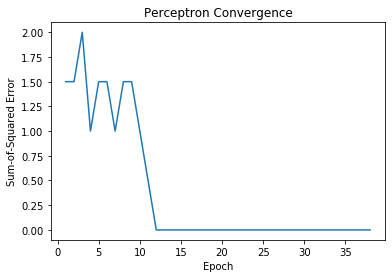

In [74]:
J = perceptron_train(df_x, df_y, z, eta, t)[1]     # pulling out the sum-of-squared errors from the tuple
epoch = np.linspace(1,len(J),len(J))

%matplotlib inline  
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

In [ ]:
# Note that the sum of squared error drops to near zero at 12 epochs

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [116]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [117]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn import preprocessing

# Get list of features
feats = list(diabetes)[:-1]

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(diabetes.drop(['Outcome'], axis=1))
X = pd.DataFrame(scaled_df, columns=[feats])
X.head()

C:\Users\ASG\.conda\envs\U4-S1-NLP\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [131]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx*(1 - sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
    
        # Randomly Initialize Weights
        # Xfloat = map(lambda x: float(x),X)
        self.weight = np.zeros(1 + X.shape[1])
    
        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                # Weighted sum of inputs / weights
                delta_w = float(self.rate) * (float(target) - float(self.predict(xi))
                # self.weight[1:] += delta_w * xi
                self.weight[1:] += delta_w * adjusted
                self.weight[0] += delta_w
                # err += int(delta_w != 0.0)
                correct_outputs += int(delta_w != 0.0)
                # Activation
                activated_output = sigmoid(self.weight[0])
                err = correct_outputs - activated_output
                adjusted = err*sigmoid_derivative(activated_output)
            # Calculate error
            self.errors.append(err)
        return self

    def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)

SyntaxError: invalid syntax (<ipython-input-131-b314cd7c2d54>, line 35)

In [125]:
# Plot the misclassification errors versus the number of epochs

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [ ]:
# Visualize the decision boundaries
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

In [ ]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('has diabetes')
plt.ylabel('does not have diabetes')
plt.legend(loc='upper left')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?